In [1]:
import matplotlib.pyplot as plt
import math

# Constant

Energy to send a packet

In [2]:
EnergyTxRxCircuitry = 50     #nJ/bit
packet = 2000       #bit
k = 1               #nJ/bit/m²

battery = 5         #mJ

PacketEnergy = packet*EnergyTxRxCircuitry
print("Energy necessary to send a packet: ", PacketEnergy, "nJ")


Energy necessary to send a packet:  100000 nJ


# Finding system's lifetime

Sensors positioning

In [3]:
sensors = [(1,2), (10,3), (4,8), (15,7), (6,1), (9,12), (14,4), (3, 10), (7,7), (12, 14)]
sink = (20,20)
x_coords = [sensor[0] for sensor in sensors]
y_coords = [sensor[1] for sensor in sensors]

Plot of the sensors

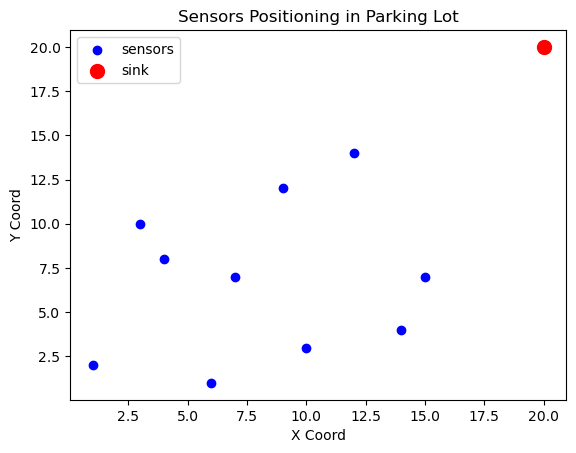

In [4]:
plt.scatter(x_coords, y_coords, color='b', label='sensors')

plt.scatter(20, 20, color='r', marker='o', s=100, label='sink')

plt.xlabel('X Coord')
plt.ylabel('Y Coord')
plt.title('Sensors Positioning in Parking Lot')

plt.legend()

plt.show()

Computing the distances from each node to the sink

In [5]:
distances = [math.sqrt((x - sink[0])**2 + (y - sink[1])**2) for x, y in sensors]
max = -1
for i, dist in enumerate(distances):
    print(f"Distance from the the node {sensors[i]} to the sink is: {dist:.2f} meters")
    if(dist > max):
        max = dist

Distance from the the node (1, 2) to the sink is: 26.17 meters
Distance from the the node (10, 3) to the sink is: 19.72 meters
Distance from the the node (4, 8) to the sink is: 20.00 meters
Distance from the the node (15, 7) to the sink is: 13.93 meters
Distance from the the node (6, 1) to the sink is: 23.60 meters
Distance from the the node (9, 12) to the sink is: 13.60 meters
Distance from the the node (14, 4) to the sink is: 17.09 meters
Distance from the the node (3, 10) to the sink is: 19.72 meters
Distance from the the node (7, 7) to the sink is: 18.38 meters
Distance from the the node (12, 14) to the sink is: 10.00 meters


All the nodes will consume the same amount of energy to power the transmission circuitry, so the node which is furthest from the sink will consume more energy to transmit the payload, so it will finish the battery earlier

In [6]:
MaxTransmissionEnergy = k*max**2 #nJ/bit
print("Max transmission energy: ", MaxTransmissionEnergy," nJ/bit")

Max transmission energy:  685.0  nJ/bit


Total energy consumption of the furthest node

In [7]:
TotEnergy= EnergyTxRxCircuitry + MaxTransmissionEnergy
print("Total consumed energy:", TotEnergy," nJ")

Total consumed energy: 735.0  nJ


Number of **cycles** needed to consume the battery:  

In [8]:
cycles = battery / (TotEnergy/10e2)
print("Power cycles: ", cycles)
print(f"Lifetime: {cycles * 10:.2f} minutes")

Power cycles:  6.802721088435375
Lifetime: 68.03 minutes


# Optimal sink position

To determine the optimal position of the sink while minimizing the total distance to all sensors, the sink should be positioned at the average x and y position of the nodes. This can be demonstrated to be true using mathematical analysis: define the cost function as the sum of all transmission costs, derive in x and y parameters and find the value of each parameter where the derivatives are null.

$$
S = \sum_{i=1}^{10} E_{tx}(d) = \sum_{i=1}^{10} k \cdot d^2 = \sum_{i=1}^{10} k \cdot \left( \sqrt{(x_i - x)^2 + (y_i - y)^2} \right)^2
$$

$$
S = \sum_{i=1}^{10} E_{tx}(d) = \sum_{i=1}^{10} k \cdot d^2 = \sum_{i=1}^{10} k \cdot \left( (x_i - x)^2 + (y_i - y)^2 \right)
$$

### **Partial Derivative with respect to x**  
To find the minimum, differentiate _S_ with respect to _x_:

$$
\frac{\partial S}{\partial x} = \sum_{i=1}^{10} k \cdot 2 (x - x_i)
$$

Setting this derivative equal to zero:

$$
\sum_{i=1}^{10} k \cdot 2 (x - x_i) = 0
$$

$$
\sum_{i=1}^{10} (x_s - x_i) = 0
$$

$$
x_s = \frac{1}{10} \sum_{i=1}^{10} x_i
$$

_S_ is the **arithmetic mean** of the values _xi_.

Similarly can be done with the partial derivative wrt _y_, so it's possible to affirm that the point that minimizes the trasmission cost is simply the **arithmetic mean of the points**:

$$
(x_s, y_s) = \left( \frac{1}{10} \sum_{i=1}^{10} x_i, \frac{1}{10} \sum_{i=1}^{10} y_i \right)
$$

This means that the optimal transmission position is at the **average** location of all points


In [9]:
meanX = sum(x_coords) / len(x_coords)
meanY = sum(y_coords) / len(y_coords)

optimal_sink = (meanX, meanY)
optimal_sink_x = optimal_sink[0]
optimal_sink_y = optimal_sink[1]

print("Optimal coordinates for the sink: ", optimal_sink)

Optimal coordinates for the sink:  (8.1, 6.8)


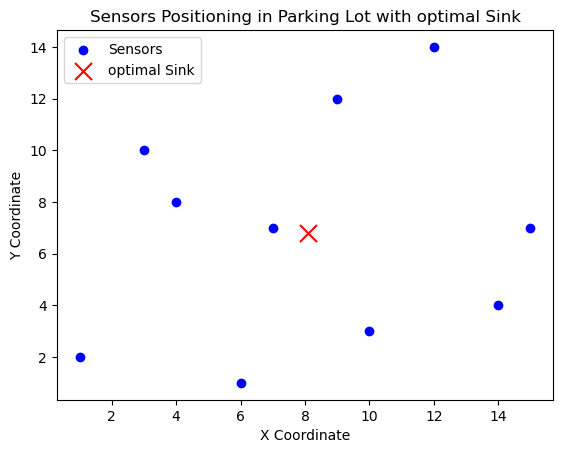

In [10]:
plt.scatter(x_coords, y_coords, color='b', label='Sensors')

plt.scatter(optimal_sink[0], optimal_sink[1], color='r', marker='x', s=150, label='optimal Sink')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Sensors Positioning in Parking Lot with optimal Sink')

plt.legend()
plt.show()

# Trade offs of a mobile sink

A mobile sink forces sensors to adjust their transmission power dynamically, which can increase the energy consumption.
If the sink moves too far, some nodes may not reach the sink and will be forced to retransmit data, if reliabile communication protocols are used, otherwise the data will be lost.

The position granting the lowest energy consumption is one and so it would not be useful in terms of energy consumes to implement a dynamical sink.